# **Final Project [ROBT 407]**
**Done by:** Nurbek Alibekov, Nurzhan Bekzhanov, Nursaule Erkinkyzy
## **Predicting presence of Heart Diseases**


In [ ]:
import torch
import warnings
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from torch import nn, optim
from sklearn import neighbors
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
from torch.nn import functional as F
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from torch.utils.data import DataLoader, Dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Robt407_Final Project/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


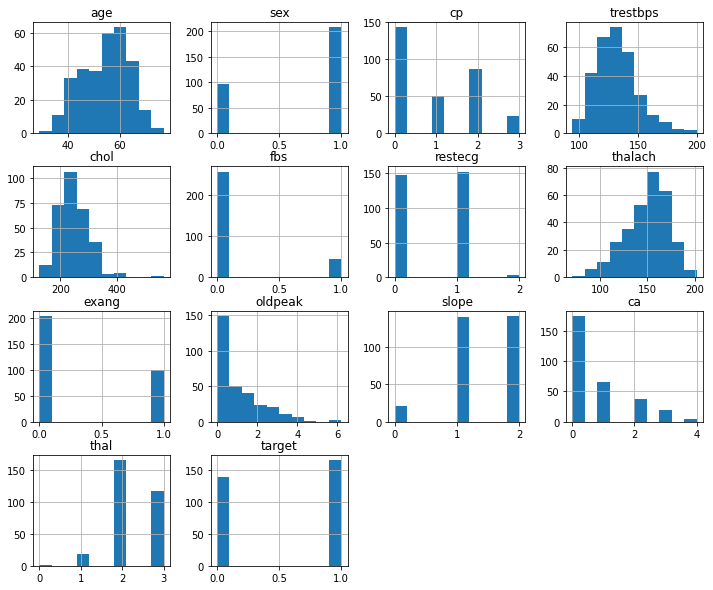

In [ ]:
df.hist(figsize=(12,10));

#KNN Algorithm

Accuracy: 0.902


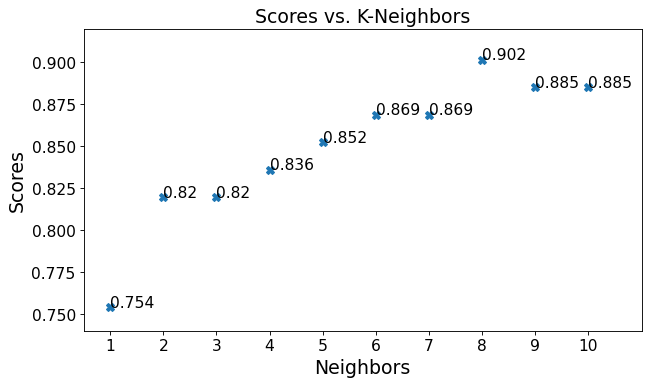

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/University/ROBT 407_Machine learning/Final Project/heart.csv')
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

MinMaxScale = MinMaxScaler((-1, 1))
df[columns_to_scale] = MinMaxScale.fit_transform(df[columns_to_scale])

X = df.drop("target", axis=1)
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)

knn_scores = []
for k in range(1,11):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
print("Accuracy:",np.max(np.round(knn_scores, 3)))

plt.figure(figsize=(9, 5), dpi=80)
plt.plot([k for k in range(1, 11)], knn_scores, 'X', markersize=8)
for i in range(1,11):
    plt.text(i, knn_scores[i-1], np.round(knn_scores[i-1], 3), fontsize=14, horizontalalignment='left')
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Neighbors', fontsize=17)
plt.ylabel('Scores', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim((0.74, 0.92))
plt.xlim((0.5, 11))  
plt.title('Scores vs. K-Neighbors',fontsize=17)
plt.show()

#SVM Algorithm

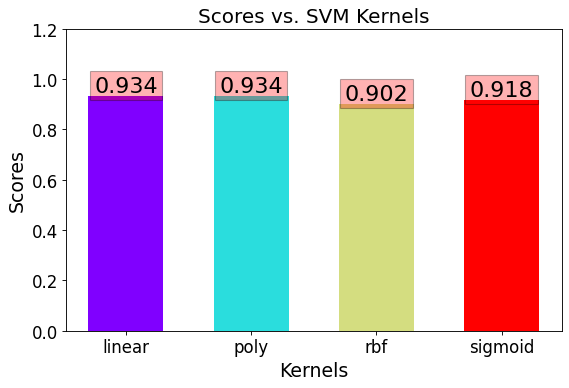

[0.9344262295081968,
 0.9344262295081968,
 0.9016393442622951,
 0.9180327868852459]

In [ ]:
#SVM
df = pd.read_csv('/content/drive/MyDrive/University/ROBT 407_Machine learning/Final Project/heart.csv')
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = StandardScaler().fit_transform(df[columns_to_scale])

X = df.drop("target", axis=1)
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)

svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(C=0.2, kernel=kernels[i], degree=1)
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

#Plotting
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.figure(figsize=(8, 5), dpi=80)
plt.bar(kernels, svc_scores, color = colors, align='center', width=0.6)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], np.round(svc_scores[i], 3), fontsize=20, horizontalalignment='center', verticalalignment='bottom', bbox=dict(facecolor='red', alpha=0.3))
plt.xlabel('Kernels', fontsize=17)
plt.ylabel('Scores', fontsize=17)
plt.title('Scores vs. SVM Kernels', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim((0, 1.2))   
plt.show()
svc_scores

In [ ]:
#SVM + CV
df = pd.read_csv('/content/drive/MyDrive/University/ROBT 407_Machine learning/Final Project/heart.csv')
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
MinMaxScale = MinMaxScaler((-1, 1))
df[columns_to_scale] = MinMaxScale.fit_transform(df[columns_to_scale])

#Splitting the dataset
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#Implementing cross validation
k = 10
kf = KFold(n_splits=k, random_state=123, shuffle=True)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']  

for i in range(len(kernels)): 
  print("Kernel Type",kernels[i])
  print('-------------')
  acc_score = []
  svc_classifier = SVC(C=0.2, kernel=kernels[i], degree=1)

  for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    svc_classifier.fit(X_train, y_train)
    pred_values = svc_classifier.predict(X_test)
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(np.round(acc, 4))
  
  avg_acc_score = round(np.sum(acc_score)/k, 4)
  print('accuracy of each fold : {}'.format(acc_score))
  print('Avg accuracy : {}'.format(avg_acc_score))
  if (i != len(kernels)):
    print('-------------')
  print('\n')

Kernel Type linear
-------------
accuracy of each fold : [0.9677, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9667, 1.0, 1.0]
Avg accuracy : 0.9934
-------------


Kernel Type poly
-------------
accuracy of each fold : [0.8387, 1.0, 0.871, 0.9667, 0.9, 0.9, 0.9333, 0.9667, 0.9667, 1.0]
Avg accuracy : 0.9343
-------------


Kernel Type rbf
-------------
accuracy of each fold : [0.8387, 1.0, 0.871, 0.9333, 0.9, 0.9, 0.9333, 0.9667, 0.9667, 1.0]
Avg accuracy : 0.931
-------------


Kernel Type sigmoid
-------------
accuracy of each fold : [0.8387, 1.0, 0.871, 0.9, 0.9, 0.9333, 0.9667, 0.9667, 0.9667, 1.0]
Avg accuracy : 0.9343
-------------




#Logistic Regression

In [ ]:
#Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/University/ROBT 407_Machine learning/Final Project/heart.csv')
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
MinMaxScale = MinMaxScaler((-1, 1))
df[columns_to_scale] = MinMaxScale.fit_transform(df[columns_to_scale])
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
 
#Implementing cross validation
k = 10
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(np.round(acc, 4))
     
avg_acc_score = round((np.sum(acc_score)/k), 4)
 
print('Accuracy of each fold : {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

Accuracy of each fold : [1.0, 0.9677, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9667]
Avg accuracy : 0.9934


#Deep Neural Network

In [ ]:
#NN + CV
class FeatureDataset(Dataset):
  def __init__(self, file_name):
    dataFrame = pd.read_csv(file_name)
    dataFrame = pd.get_dummies(dataFrame, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
    columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    MinMaxScale = MinMaxScaler((-1, 1))
    dataFrame[columns_to_scale] = MinMaxScale.fit_transform(dataFrame[columns_to_scale])

    x = dataFrame.drop("target", axis=1).values
    y = dataFrame['target'].values

    self.x = torch.tensor(x, dtype=torch.float32)
    self.y = torch.tensor(y)

  def __len__(self):
    return len(self.y)
  
  def __getitem__(self,idx):
    return self.x[idx], self.y[idx]

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(30, 800)
        self.fc2 = nn.Linear(800, 500)
        self.fc3 = nn.Linear(500, 200)
        self.fc4 = nn.Linear(200, 2)
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        x = self.fc4(x)
        return x

losses = []
results = {}
k_folds = 10
num_epochs = 10
kfold = KFold(n_splits=k_folds, shuffle=True)
criterion = nn.CrossEntropyLoss()
dataset = FeatureDataset('/content/drive/MyDrive/University/ROBT 407_Machine learning/Final Project/heart.csv')

for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
  
  print(f'FOLD {fold}')
  print('--------------------------------')
  train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
  test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=1, sampler=train_subsampler)
  testloader = torch.utils.data.DataLoader(dataset, batch_size=1, sampler=test_subsampler)
  
  net = NeuralNetwork()
  optimizer = optim.Adam(net.parameters(), lr=0.0005)

  for epoch in range(0, num_epochs):
    print(f'Starting epoch {epoch+1}')
    current_loss = 0.0
    for i, data in enumerate(trainloader, 0):
      inputs, targets = data
      optimizer.zero_grad()
      output = net.forward(inputs)
      loss = criterion(output, targets)
      loss.backward()
      optimizer.step()
      losses.append(loss.item())
      
      #Print statistics
      current_loss += loss.item()
      if i % 100 == 0:
        print('Loss after mini-batch %5d: %.3f' % (i + 1, current_loss / 100))
        current_loss = 0.0
  #Process is complete.
  print('Training process has finished. Saving trained model.')

  #Evaluationfor this fold
  correct, total = 0, 0
  with torch.no_grad():

    # Iterate over the test data and generate predictions
    for i, data in enumerate(testloader, 0):

      # Get inputs
      inputs, targets = data

      # Generate outputs
      outputs = net(inputs)

      # Set total and correct
      _, predicted = torch.max(outputs.data, 1)
      total += targets.size(0)
      correct += (predicted == targets).sum().item()

    # Print accuracy
    print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
    print('--------------------------------')
    results[fold] = 100.0 * (correct / total)
    
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')

FOLD 0
--------------------------------
Starting epoch 1
Loss after mini-batch     1: 0.005
Loss after mini-batch   101: 0.725
Loss after mini-batch   201: 0.696
Starting epoch 2
Loss after mini-batch     1: 0.009
Loss after mini-batch   101: 0.646
Loss after mini-batch   201: 0.533
Starting epoch 3
Loss after mini-batch     1: 0.004
Loss after mini-batch   101: 0.374
Loss after mini-batch   201: 0.382
Starting epoch 4
Loss after mini-batch     1: 0.000
Loss after mini-batch   101: 0.376
Loss after mini-batch   201: 0.400
Starting epoch 5
Loss after mini-batch     1: 0.008
Loss after mini-batch   101: 0.408
Loss after mini-batch   201: 0.419
Starting epoch 6
Loss after mini-batch     1: 0.000
Loss after mini-batch   101: 0.409
Loss after mini-batch   201: 0.285
Starting epoch 7
Loss after mini-batch     1: 0.001
Loss after mini-batch   101: 0.430
Loss after mini-batch   201: 0.279
Starting epoch 8
Loss after mini-batch     1: 0.001
Loss after mini-batch   101: 0.322
Loss after mini-bat

# Sources

1.   https://towardsdatascience.com/predicting-presence-of-heart-diseases-using-machine-learning-36f00f3edb2c
2.   https://www.researchgate.net/profile/Dhai-Eddine-Salhi/publication/349470771_Using_Machine_Learning_for_Heart_Disease_Prediction/links/6063a4aa299bf173677dc2ca/Using-Machine-Learning-for-Heart-Disease-Prediction.pdf
3. https://www.machinecurve.com/index.php/2021/02/03/how-to-use-k-fold-cross-validation-with-pytorch/